In [16]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os 
import sys
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup
from matplotlib.colors import ListedColormap
from minisom import MiniSom 
import folium
from folium.plugins import MarkerCluster
import leafmap

In [2]:
schema = 'projects_research'
table = 'arroyovivo_residuos_hex'
query = f"SELECT * FROM {schema}.{table}"
residuos = aup.gdf_from_query(query, geometry_col='geometry')

print(residuos.shape)
residuos.head(1)

(562, 51)


,hex_id,res,geometry,aluminio,aluminio_quantity,baterias,baterias_quantity,carton,carton_quantity,cenizas,...,unicel,unicel_quantity,vidrio,vidrio_quantity,epi,epi_quantity,total_points,most_common_point,total_quantity,most_common_quantity
0,8a48a20296a7fff,10,"POLYGON ((-100.30269 25.63956, -100.30201 25.6...",13.0,24.0,0.0,0.0,36.0,44.0,0.0,...,207.0,259.0,89.0,137.0,1.0,1.0,1918.0,Plastico,2669.0,Plastico_quantity


In [3]:
residuos[residuos['tela'] == 15]['tela_quantity'].sum()

197.0

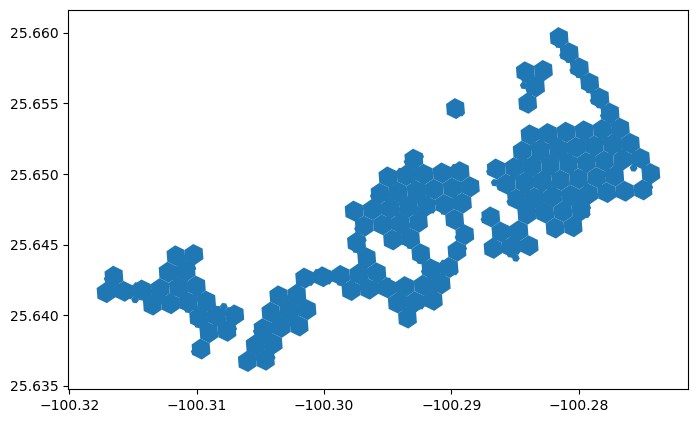

In [4]:
f, axx = plt.subplots(1, figsize=(8, 8))
axx = residuos.plot(axes=axx, alpha=1)
#gdf.xlim(-103.8, -102.8)
#gdf.ylim(20.3, 21)
plt.show()

In [5]:
pd.isna(residuos).sum()

hex_id                      0
res                         0
geometry                    0
aluminio                    0
aluminio_quantity           0
baterias                    0
baterias_quantity           0
carton                      0
carton_quantity             0
cenizas                     0
cenizas_quantity            0
ceramica                    0
ceramica_quantity           0
electronica                 0
electronica_quantity        0
escombros                   0
escombros_quantity          0
goma                        0
goma_quantity               0
llantas                     0
llantas_quantity            0
madera                      0
madera_quantity             0
metal                       0
metal_quantity              0
organico                    0
organico_quantity           0
otros                       0
otros_quantity              0
papel                       0
papel_quantity              0
pesca                       0
pesca_quantity              0
plastico  

In [6]:
residuos['tela'].unique()

array([ 84.,  81., 173.,  15.,  66.,  45., 175.,  39.,  44.,  36.,  52.,
        26.,  40.,  11.,  27.,  16.,   0.,  14.,  43.,  18.,   7.,  19.,
        25.,  23.,   4.,  35.,  30.,   5.,  21.,  29.,  12.,  13.,   9.,
        20.,   8.,   2.,   6.,   1.,   3.,  10.,  38.])

In [7]:
residuos[residuos['tela'] == 2]['hex_id'].count()

52

### Contar hexágonos para el tipo de tela

In [8]:
tela = residuos['tela'].unique()

for i in tela:
    resid_hex = residuos[residuos['tela'] == i]['tela_quantity'].sum() 
    contar_Hex = residuos[residuos['tela'] == i]['hex_id'].count()
    print(f'Tela # {i}: {contar_Hex} hexágono(s) con un total de {resid_hex} residuos de tela.')
    #print(residuos[residuos['tela'] == i]['tela_quantity'])

Tela # 84.0: 1 hexágono(s) con un total de 108.0 residuos de tela.
Tela # 81.0: 1 hexágono(s) con un total de 170.0 residuos de tela.
Tela # 173.0: 1 hexágono(s) con un total de 759.0 residuos de tela.
Tela # 15.0: 3 hexágono(s) con un total de 197.0 residuos de tela.
Tela # 66.0: 1 hexágono(s) con un total de 76.0 residuos de tela.
Tela # 45.0: 1 hexágono(s) con un total de 87.0 residuos de tela.
Tela # 175.0: 1 hexágono(s) con un total de 567.0 residuos de tela.
Tela # 39.0: 1 hexágono(s) con un total de 127.0 residuos de tela.
Tela # 44.0: 1 hexágono(s) con un total de 57.0 residuos de tela.
Tela # 36.0: 1 hexágono(s) con un total de 55.0 residuos de tela.
Tela # 52.0: 3 hexágono(s) con un total de 164.0 residuos de tela.
Tela # 26.0: 1 hexágono(s) con un total de 37.0 residuos de tela.
Tela # 40.0: 1 hexágono(s) con un total de 55.0 residuos de tela.
Tela # 11.0: 3 hexágono(s) con un total de 42.0 residuos de tela.
Tela # 27.0: 2 hexágono(s) con un total de 77.0 residuos de tela.
T

### Mapa Hexágonos distinguidos por los residuos

#### La mayor cantidad de residuos por Hexágono

In [9]:
imp_var_quantity = ['hex_id', 'geometry', 'aluminio_quantity', 'baterias_quantity', 'carton_quantity','cenizas_quantity',
           'ceramica_quantity','electronica_quantity','escombros_quantity','goma_quantity','llantas_quantity',
           'madera_quantity','metal_quantity','organico_quantity','otros_quantity','papel_quantity','pesca_quantity',
           'plastico_quantity','salud e higiene_quantity','tabaco_quantity','tela_quantity','unicel_quantity',
           'vidrio_quantity','epi_quantity']  
residuos_df = residuos.loc[:,imp_var_quantity]
print(residuos_df.shape)
residuos_df.head(2)

(562, 24)


,hex_id,geometry,aluminio_quantity,baterias_quantity,carton_quantity,cenizas_quantity,ceramica_quantity,electronica_quantity,escombros_quantity,goma_quantity,...,otros_quantity,papel_quantity,pesca_quantity,plastico_quantity,salud e higiene_quantity,tabaco_quantity,tela_quantity,unicel_quantity,vidrio_quantity,epi_quantity
0,8a48a20296a7fff,"POLYGON ((-100.30269 25.63956, -100.30201 25.6...",24.0,0.0,44.0,0.0,52.0,2.0,39.0,0.0,...,2.0,140.0,0.0,1479.0,37.0,21.0,108.0,259.0,137.0,1.0
1,8a48a202978ffff,"POLYGON ((-100.30331 25.63839, -100.30263 25.6...",33.0,0.0,15.0,2.0,5.0,5.0,59.0,2.0,...,6.0,119.0,0.0,1640.0,38.0,7.0,170.0,238.0,55.0,0.0


In [15]:
imp_var = ['aluminio', 'baterias', 'carton','cenizas','ceramica','electronica','escombros','goma',
           'llantas','madera','metal','organico','otros','papel','pesca','plastico','salud e higiene',
           'tabaco','tela','unicel','vidrio','epi'] 

lista_hex = residuos_df['hex_id'].tolist()

cantidad_filas = residuos_df.shape[0]

for i in range(cantidad_filas):
    hex_id = lista_hex[i]
    fila_seleccionada = residuos_df.iloc[i, 2:]
    maximo = max(fila_seleccionada)
    
    # Encontrar todos los índices del valor máximo
    indices_maximo = [j for j, valor in enumerate(fila_seleccionada) if valor == maximo]
    
    # Obtener los materiales correspondientes a los índices máximos
    materiales_maximos = [imp_var[indice] for indice in indices_maximo]
    
    
    print(f'Máximo del hexágono {hex_id}({i}): {maximo} del material(es) {materiales_maximos}')

Máximo del hexágono 8a48a20296a7fff(0): 1479.0 del material(es) ['plastico']
Máximo del hexágono 8a48a202978ffff(1): 1640.0 del material(es) ['plastico']
Máximo del hexágono 8a48a202baaffff(2): 1787.0 del material(es) ['plastico']
Máximo del hexágono 8a48a202ba1ffff(3): 1200.0 del material(es) ['plastico']
Máximo del hexágono 8a48a202ba0ffff(4): 1363.0 del material(es) ['plastico']
Máximo del hexágono 8a48a202baa7fff(5): 1167.0 del material(es) ['plastico']
Máximo del hexágono 8b48a202baacfff(6): 1251.0 del material(es) ['plastico']
Máximo del hexágono 8a48a2029297fff(7): 442.0 del material(es) ['plastico']
Máximo del hexágono 8a48a202ba17fff(8): 722.0 del material(es) ['plastico']
Máximo del hexágono 8b48a20296a6fff(9): 381.0 del material(es) ['plastico']
Máximo del hexágono 8b48a202ba0afff(10): 997.0 del material(es) ['plastico']
Máximo del hexágono 8b48a202baa5fff(11): 407.0 del material(es) ['plastico']
Máximo del hexágono 8a48a202975ffff(12): 348.0 del material(es) ['plastico']
Má

# Mapa Interactivo

### La menor cantidad de residuos por hexágono

In [ ]:
imp_var = ['aluminio', 'baterias', 'carton','cenizas','ceramica','electronica','escombros','goma',
           'llantas','madera','metal','organico','otros','papel','pesca','plastico','salud e higiene',
           'tabaco','tela','unicel','vidrio','epi'] 

lista_hex = residuos_df['hex_id'].tolist()

cantidad_filas = residuos_df.shape[0]

for i in range(cantidad_filas):
    hex_id = lista_hex[i]
    fila_seleccionada = residuos_df.iloc[i, 2:]
    minimo = min(fila_seleccionada)
    
    # Encontrar todos los índices del valor máximo
    indices_minimo = [j for j, valor in enumerate(fila_seleccionada) if valor == minimo]
    
    # Obtener los materiales correspondientes a los índices máximos
    materiales_minimos = [imp_var[indice] for indice in indices_minimo]
    
    
    print(f'Mínimo del hexágono {hex_id}({i}): {minimo} del material(es) {materiales_minimos}')

In [ ]:
fila_seleccionada = residuos.iloc[1, 2:]

# Convertir la fila seleccionada a una lista
fila_lista = fila_seleccionada.tolist()

print("Lista de la fila (excluyendo la primera columna):", fila_lista)

### Preparar data para el minisom

In [ ]:
imp_var = ['hex_id', 'aluminio', 'baterias', 'carton','cenizas','ceramica','electronica','escombros','goma',
                      'llantas','madera','metal','organico','otros','papel','pesca','plastico','salud e higiene','tabaco'
                      ,'tela','unicel','vidrio','epi']  
waste_df = residuos.loc[:,imp_var]
print(waste_df.shape)
waste_df.head(2)